In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import decomposition
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

california_data = pd.read_csv("california_data.csv")
cali_filtered = california_data[['start_lng','start_lat','temperature(f)','wind_chill(f)','humidity(%)','pressure(in)','visibility(mi)','severity']].reset_index()

X = cali_filtered.iloc[:, 1:-1].values
X
X_normal = scale(X)
pca = decomposition.PCA(n_components=0.95)
pca.fit(X_normal)
scores = pca.transform(X_normal)
scores

array([[ 0.13184544,  0.14648588, -0.48262235,  0.12116104,  0.74505976],
       [-1.04674142, -0.56169841,  0.33887378,  1.36016307, -1.75249058],
       [ 1.17871157, -1.32691472, -0.07688523,  0.70725814, -0.63941403],
       ...,
       [-0.646777  ,  1.4684107 , -0.0902674 , -2.2905763 , -0.69881399],
       [ 0.83198508, -0.4788145 , -0.07967788,  0.59040261, -0.73919095],
       [ 3.7142329 ,  0.19921899,  1.21590119, -0.45945103, -0.21467182]])

In [52]:
scores_df = pd.DataFrame(scores, columns=[["PC_"+ str(i) for i in range(1,len(scores.T)+1)]])
scores_df

,PC_1,PC_2,PC_3,PC_4,PC_5
0,0.131845,0.146486,-0.482622,0.121161,0.745060
1,-1.046741,-0.561698,0.338874,1.360163,-1.752491
2,1.178712,-1.326915,-0.076885,0.707258,-0.639414
3,0.406698,-0.821827,0.715425,0.363747,0.504534
4,-0.130122,-1.754945,-0.261282,0.892511,0.091868
...,...,...,...,...,...
113150,0.026901,-1.452325,0.510231,0.204624,0.417990
113151,-0.031907,-1.655786,-0.888229,-1.023419,0.388926
113152,-0.646777,1.468411,-0.090267,-2.290576,-0.698814
113153,0.831985,-0.478815,-0.079678,0.590403,-0.739191


In [53]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
explained_variance = np.insert(explained_variance, 0, 0)
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])

[0.39327316 0.25321357 0.14956662 0.13000057 0.0586152 ]


In [54]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=4))
print(cumulative_variance)
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

[0.     0.3933 0.6465 0.7961 0.9261 0.9847]


In [55]:
import numpy as np
import plotly.express as px
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4','PC5'], columns=['PC'])
df_var_explained = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_var_explained

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.0000
1,PC1,0.393273,0.3933
2,PC2,0.253214,0.6465
3,PC3,0.149567,0.7961
4,PC4,0.130001,0.9261
5,PC5,0.058615,0.9847


In [56]:
import plotly.graph_objects as go 
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_var_explained['PC'],
        y=df_var_explained['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_var_explained['PC'],
        y=df_var_explained['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

In [18]:
scores_df.dtypes

PC_1    float64
PC_2    float64
PC_3    float64
PC_4    float64
PC_5    float64
dtype: object

In [19]:
cali_filtered.head()

,index,start_lng,start_lat,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),severity
0,0,-120.492822,34.661189,68.0,68.0,73.0,29.79,10.0,2
1,1,-118.985176,35.395484,42.0,42.0,34.0,29.77,10.0,2
2,2,-117.161407,32.771645,63.0,63.0,40.0,29.69,10.0,2
3,3,-118.424461,34.243271,64.0,64.0,64.0,28.92,10.0,2
4,4,-117.321490,33.120965,55.0,55.0,72.0,29.68,10.0,2


In [20]:
# Silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_ = []
wcss = []
for i in range (2,8):
    model = KMeans(n_clusters=i,random_state=1233)
    y_kmeans = model.fit_predict(scores_df)
    wcss.append(model.inertia_)
    print("Iteration ",i, "is done")
    silhouette_.append(silhouette_score(scores_df, y_kmeans))
    print("Silhouette for ",i,"is done")


/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Iteration  2 is done
Silhouette for  2 is done


/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Iteration  3 is done
Silhouette for  3 is done


/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Iteration  4 is done
Silhouette for  4 is done


/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Iteration  5 is done
Silhouette for  5 is done


/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Iteration  6 is done
Silhouette for  6 is done


/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Iteration  7 is done
Silhouette for  7 is done


In [21]:
silhouette_

[0.3300643885892423,
 0.29787876901206267,
 0.3150269314831769,
 0.29531125146241916,
 0.31507321231037594,
 0.2740933556105331]

Text(0.5, 1.0, 'Elbow Plot')

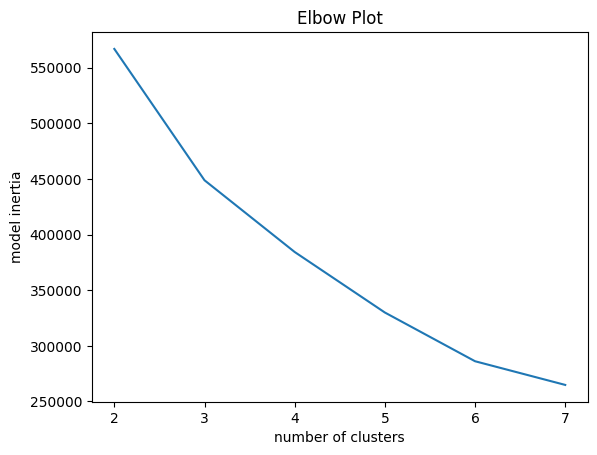

In [22]:
plt.plot(range(2,8),wcss)
plt.xlabel("number of clusters")
plt.ylabel("model inertia")
plt.title("Elbow Plot")

In [23]:
model = KMeans(n_clusters=6,random_state=1233)
y_kmeans = model.fit_predict(scores_df)
scores_df['cluster'] = y_kmeans

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [24]:
concat_df = pd.concat([cali_filtered,scores_df],axis = 1)
concat_df.columns = ['index','start_lng', 'start_lat', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)','severity','PC1','PC2','PC3','PC4','PC5','cluster']

In [25]:
concat_df

,index,start_lng,start_lat,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),severity,PC1,PC2,PC3,PC4,PC5,cluster
0,0,-120.492822,34.661189,68.0,68.0,73.0,29.79,10.0,2,0.131845,0.146486,-0.482622,0.121161,0.745060,1
1,1,-118.985176,35.395484,42.0,42.0,34.0,29.77,10.0,2,-1.046741,-0.561698,0.338874,1.360163,-1.752491,1
2,2,-117.161407,32.771645,63.0,63.0,40.0,29.69,10.0,2,1.178712,-1.326915,-0.076885,0.707258,-0.639414,1
3,3,-118.424461,34.243271,64.0,64.0,64.0,28.92,10.0,2,0.406698,-0.821827,0.715425,0.363747,0.504534,1
4,4,-117.321490,33.120965,55.0,55.0,72.0,29.68,10.0,2,-0.130122,-1.754945,-0.261282,0.892511,0.091868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113150,113150,-117.558418,34.023927,60.0,60.0,72.0,29.05,9.0,2,0.026901,-1.452325,0.510231,0.204624,0.417990,1
113151,113151,-117.672854,33.562449,65.0,65.0,84.0,29.99,6.0,2,-0.031907,-1.655786,-0.888229,-1.023419,0.388926,1
113152,113152,-121.606631,38.925281,69.0,69.0,49.0,29.89,4.0,2,-0.646777,1.468411,-0.090267,-2.290576,-0.698814,0
113153,113153,-118.460635,34.065767,63.0,63.0,37.0,29.79,10.0,2,0.831985,-0.478815,-0.079678,0.590403,-0.739191,1


/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='PC1', ylabel='PC2'>

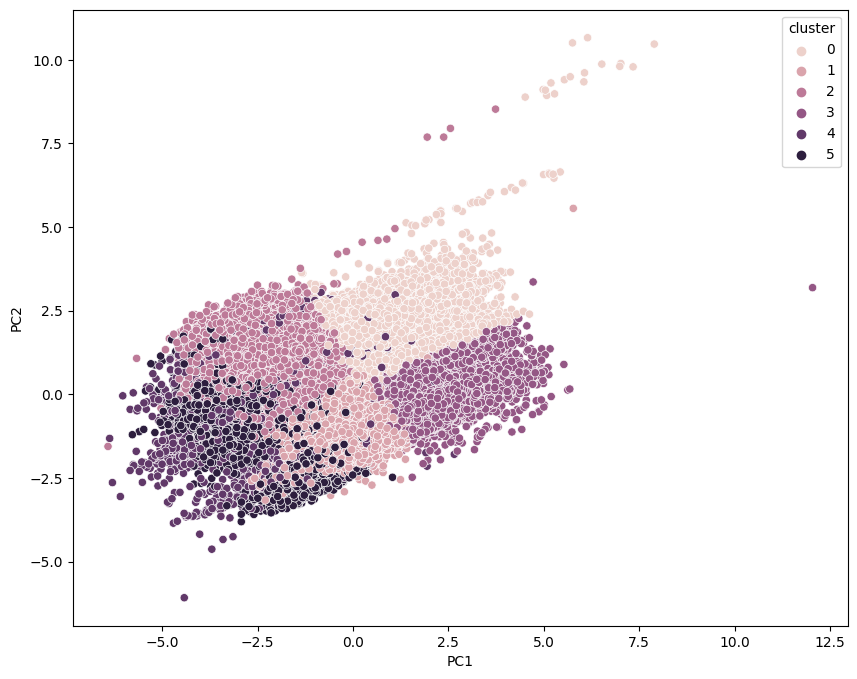

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = concat_df, x='PC1',y='PC2',hue='cluster')

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/abiramvyas/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:14

<Axes: xlabel='PC1', ylabel='PC5'>

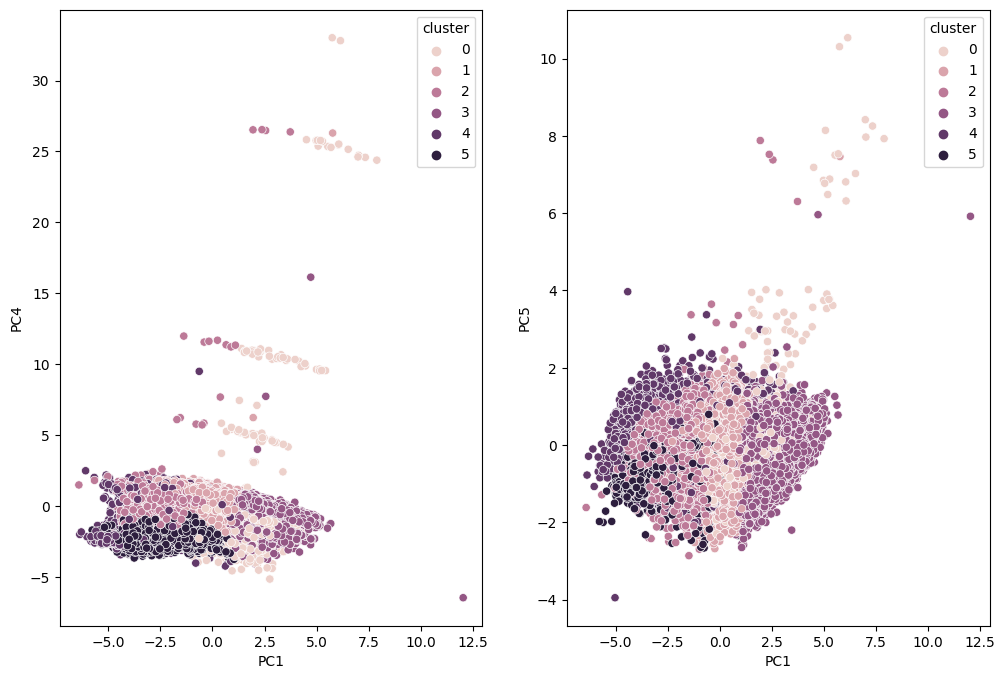

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(data = concat_df, x='PC1',y='PC4',hue='cluster')
plt.subplot(1,2,2)
sns.scatterplot(data = concat_df, x='PC1',y='PC5',hue='cluster')

In [33]:
silhouette_df = pd.DataFrame()
silhouette_df['silhouette_score'] = silhouette_
silhouette_df['cluster_size'] = range(2,8)

In [34]:
silhouette_df

,silhouette_score,cluster_size
0,0.330064,2
1,0.297879,3
2,0.315027,4
3,0.295311,5
4,0.315073,6
5,0.274093,7


<Axes: xlabel='cluster_size', ylabel='silhouette_score'>

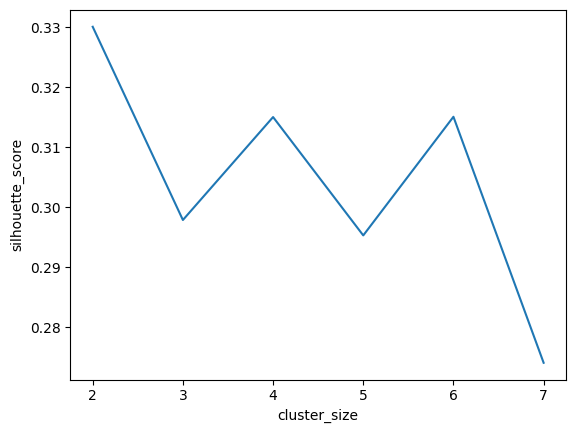

In [36]:
import warnings
warnings.filterwarnings("ignore")
sns.lineplot(x='cluster_size', y = 'silhouette_score',data=silhouette_df)

In [58]:
scores_df.iloc[:, 0:-1].to_csv("pca_cali_data.csv",index=False)